In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
%matplotlib inline

In [14]:
data = pd.read_csv('penguins_cleaned_ds620.csv')
data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181,3750,0
1,39.5,17.4,186,3800,0
2,40.3,18.0,195,3250,0
3,36.7,19.3,193,3450,0
4,39.3,20.6,190,3650,0


In [51]:
# Question #1: How many features are there is the dataset? Show the code that extracts this number
index = data.index
number_of_rows = len(index)
print(number_of_rows)

333


In [52]:
# Question #2: What are the features is the dataset? Show the code that lists the feature names
data.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species'],
      dtype='object')

In [53]:
# Question #3: How many instances are there is the dataset? Show the code that extracts this number
print(len(data.columns))

5


In [18]:
X = data.drop('species', axis = 1)
y = data['species']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X =StandardScaler().fit_transform(X)

In [20]:
# Let's split the dataset into training and testing sets

# Question #6: complete the code below to split X and y into training and testing sets with 20% testing and a randomSeed=42
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = 0.20, 
                                                        random_state = 42)

In [21]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining our model as sequential
model = Sequential()

In [23]:
# Here is the code that sends the input X_train into a model with 32 nodes in the first hidden layer
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],), name='input'))

In [24]:
# Question #7: show code that adds another dense hidden layer with another 32 nodes
model.add(Dense(32, activation='relu',name='hidden'))

In [25]:
# Question #8: show code that adds the output layer using softmax. Remember that there are three output nodes (3 species)
model.add(Dense(3, activation='softmax', name='output'))

In [26]:
# Question #9: use model summary to confirm the model you built - show the function call below
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 32)                160       
_________________________________________________________________
hidden (Dense)               (None, 32)                1056      
_________________________________________________________________
output (Dense)               (None, 3)                 99        
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Question #10: compile the code using a) categorical_crossentropy for the loss function, b) stochastic gradient descent with a 0.01 learning rate as the optimizer, and c) accuracy as the metric
from keras.optimizers import SGD
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [28]:
perf=model.fit(x=np.array(X_train), y=y_train, batch_size=16, epochs=50,validation_split=0.20)

Epoch 1/50
14/14 [==============================] - 1s 23ms/step - loss: 1.0010 - accuracy: 0.7277 - val_loss: 0.9012 - val_accuracy: 0.8333
Epoch 2/50
14/14 [==============================] - 0s 4ms/step - loss: 0.9311 - accuracy: 0.7786 - val_loss: 0.8145 - val_accuracy: 0.8333
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.8612 - accuracy: 0.7824 - val_loss: 0.7360 - val_accuracy: 0.8333
Epoch 4/50
14/14 [==============================] - 0s 4ms/step - loss: 0.7724 - accuracy: 0.7869 - val_loss: 0.6667 - val_accuracy: 0.8333
Epoch 5/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.8074 - val_loss: 0.6055 - val_accuracy: 0.8333
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 0.6589 - accuracy: 0.7839 - val_loss: 0.5511 - val_accuracy: 0.8333
Epoch 7/50
14/14 [==============================] - 0s 4ms/step - loss: 0.5896 - accuracy: 0.8092 - val_loss: 0.5027 - val_accuracy: 0.8519
Epoch 8/50
14/14 [=

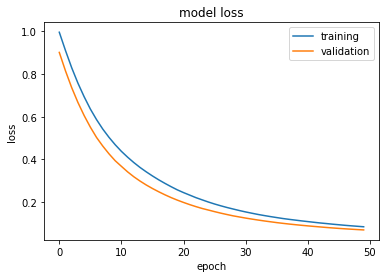

In [29]:
# use this code to plot the training metrics
plt.plot(perf.history['loss'])
plt.plot(perf.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

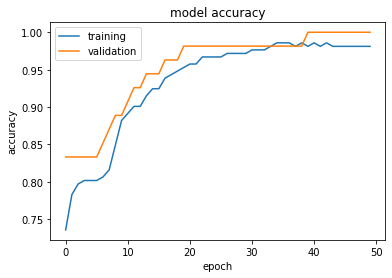

In [30]:
# Question #12 using the above code as example, plot the accuracy for the training and validation
# change the labels accordingly
plt.plot(perf.history['accuracy'])
plt.plot(perf.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

In [31]:
class_predictions = np.argmax(model.predict(X_test), axis=-1)
class_predictions

array([0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       0])

In [32]:
# Question #13 
# write some code that will calulate the accuracy of the model by comparing y_test to class_predictions
# the answer must be in percentages
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, class_predictions)
test_accuracy

0.9701492537313433

In [34]:
print("Test Accuracy : " + str(test_accuracy) + '%')
print("Predictions :")
print(class_predictions)
print("Targets :")
print(np.asarray(y_test,dtype="int32"))

Test Accuracy : 0.9701492537313433%
Predictions :
[0 2 0 1 0 2 2 1 1 1 0 0 0 0 2 0 0 1 0 2 0 0 2 1 0 0 1 2 1 2 1 2 0 0 2 2 1
 1 0 0 0 0 1 1 0 0 2 0 0 2 0 1 1 0 0 1 0 0 1 1 0 2 2 0 0 2 0]
Targets :
[0 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 1 2 1 2 1 2 0 0 2 2 1
 1 0 0 0 0 1 1 0 0 2 0 0 2 0 1 1 0 0 1 0 0 1 1 2 2 2 0 0 2 0]
